In [2]:
# Import packages for later use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load data
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

# Encode numerical data
numerical_features = train_data.dtypes[train_data.dtypes != 'object'].index.values
numerical_data = train_data[numerical_features]
test_set = test_data[[n for n in numerical_features if n != 'SalePrice']]

In [4]:
omit = ['SalePrice', 'Id']
numerical_data.fillna(0, inplace=True)
test_set.fillna(0, inplace=True)
X = numerical_data[[n for n in numerical_features if n not in omit]]
T = test_set[[n for n in numerical_features if n not in omit]]
y = train_data['SalePrice']

In [5]:
not np.any(np.isnan(X)) and np.all(np.isfinite(X))

True

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [7]:
pipeline = Pipeline([('std_scalar', StandardScaler())])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [8]:
print(lin_reg.intercept_)
print(len(lin_reg.coef_))
coef = pd.DataFrame(lin_reg.coef_, [n for n in numerical_features if n not in omit], columns=['Coefficient'])
coef

181341.95477419213
36


,Coefficient
MSSubClass,-8.464279e+03
LotFrontage,-6.472950e+02
LotArea,4.388014e+03
OverallQual,2.503882e+04
OverallCond,4.073449e+03
YearBuilt,9.855138e+03
YearRemodAdd,3.087809e+03
MasVnrArea,3.053602e+03
BsmtFinSF1,5.621627e+16
BsmtFinSF2,1.848049e+16


In [9]:
pred = lin_reg.predict(X_test)
pred

array([147049.30087802, 308990.6776749 , 118342.23656255, 182057.77596409,
       304631.82591465,  64891.37310833, 232203.89983301, 149765.49047122,
        62814.16669014, 147577.83313904, 152182.06904653, 110877.12392207,
        89783.63814602, 208758.12790727, 190307.17151645, 137304.24624974,
       210587.13216749, 131416.00383265, 115492.16608204, 230118.22837528,
       185634.79693578, 212324.83242024, 190897.91206518, 130300.03230983,
       209712.06870291, 148236.12901983, 195341.15385359,  91468.46692775,
       182526.51577427, 176369.2028156 , 115336.32882053, 278815.3004358 ,
       242479.72696616,  84817.23644454, 274571.76545301, 156772.75621172,
       143961.9139521 , 214951.61930578, 308491.19810564,  88104.60175879,
       134826.32106773, 248856.37138192,  99026.57672319, 278651.19968103,
       133759.19718474, 121693.82838394, 102203.07583998, 124076.9891941 ,
       360777.71703946, 125167.40192331, 102216.73634014, 218275.57787862,
        86989.78315771, 3

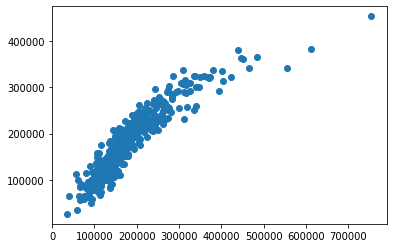

In [10]:
plt.scatter(y_test, pred)

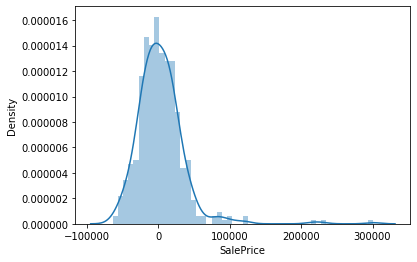

In [11]:
sns.distplot((y_test - pred), bins=50);

In [12]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 22757.0704046926
MSE: 1199875051.9356306
RMSE: 34639.21263446429
R2 Square 0.8280511708438096
Train set evaluation:
_____________________________________
MAE: 21200.068605523855
MSE: 1181848667.8241105
RMSE: 34378.0259442585
R2 Square 0.8036331563631239


In [13]:
pipe = Pipeline([('std_scalar', StandardScaler())])
X = pipe.fit_transform(X)
T = pipe.transform(T)
model = LinearRegression(normalize=True)
model.fit(X, y)
predictions = model.predict(T)
predictions

array([119502.43913291, 152301.70624163, 172900.75999226, ...,
       179816.64961046, 118989.94308931, 258062.1239682 ])

In [14]:
print(model.intercept_)
print(len(model.coef_))
coefficients = pd.DataFrame(model.coef_, [n for n in numerical_features if n not in omit], columns=['Coefficient'])
coefficients

180917.7586057272
36


,Coefficient
MSSubClass,-7.070679e+03
LotFrontage,3.223457e+02
LotArea,3.925952e+03
OverallQual,2.394804e+04
OverallCond,5.680038e+03
YearBuilt,1.021153e+04
YearRemodAdd,2.534726e+03
MasVnrArea,5.107065e+03
BsmtFinSF1,1.668604e+14
BsmtFinSF2,5.901755e+13


In [15]:
test_data['SalePrice'] = predictions
submission = test_data[[r for r in test_data if r in omit]]

In [16]:
submission

,Id,SalePrice
0,1461,119502.439133
1,1462,152301.706242
2,1463,172900.759992
3,1464,200221.384058
4,1465,194985.624758
...,...,...
1454,2915,75223.472155
1455,2916,60905.077268
1456,2917,179816.649610
1457,2918,118989.943089


In [17]:
submission.to_csv('./data/teamJarvis.csv', index=False)